## TP: Méthodes Ensemblistes

### Consignes pour ce TD :
* 1. Charger le dataset Boston de scikit-learn.

* 2. Entraîner un arbre de régression pour prédire la valeur immobilière.Tracer l'arbre, et l'importance de chacune des features de la base.Evaluer avec la MSE et le R2, sur train et test.

* 3. Entraîner plusieurs arbres de régression en faisant varier le paramètre max_depth. Evaluer les performances avec la MSE et le R2, sur train et test, et tracer la courbe de ces métriques en fonction de max_depth. Que remarquez-vous?

* 4. Entraîner plusieurs forêts aléatoires en faisant varier le paramètre max_depth. Evaluer les performances avec la MSE et le R2, sur train et test, et tracer la courbe de ces métriques en fonction de max_depth. Que remarquez-vous?

* 5. Montrer que scikit-learn aggrège les prédictions de chaque arbre de la forêt en faisait la moyenne de celles-ci.

* 6. Au lieu d'aggréger les arbres par la moyenne de leur prédictions, on veut apprendre sur X_train des coefficients pour pondérer les prédictions de chacun des arbres. Remplacer les features de la base par les prédictions de chacun des arbres, puis entraîner une régression linéaire. Représenter les valeurs des coefficients ainsi trouvés. Que remarquez-vous?

* 7. Faire de même en remplaçant la régression linéaire par une régression LASSO.

* 8. Faire de même en remplaçant la régression par les méthodes ensemblistes: Bagging, boosting, Stacking
 
* 9. De toutes ces méthodes, laquelle choissirez-vous en terme de performance, de variance et de biais du modèle.

In [11]:
#Q1 _ Charger le dataset Boston de scikit-learn

import pandas as pd

# Chemin d'accès complet vers le fichier sur votre bureau
Boston = 'C:/Users/HP/Desktop/Option data science/ML avancé/BOSTON.xlsx'

# Charger le fichier CSV dans un DataFrame pandas
data = pd.read_excel(Boston)

# Afficher les premières lignes du DataFrame pour vérifier que le chargement a réussi
print(data.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   TAX  PTRATIO       B  LSTAT  House Price  
0  296     15.3  396.90   4.98         24.0  
1  242     17.8  396.90   9.14         21.6  
2  242     17.8  392.83   4.03         34.7  
3  222     18.7  394.63   2.94         33.4  
4  222     18.7  396.90   5.33         36.2  


In [12]:
#Q2 _ 

#A _ Entraîner un arbre de régression pour prédire la valeur immobilière.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 

# Séparation des caractéristiques (X) et de la cible (y)
X = data.drop('House Price', axis=1)
y = data['House Price']

# Division en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation suivi d'un training du modèle
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
#Q2 

#B _ Tracer l'arbre, et l'importance de chacune des features de la base.

import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [15]:
#Q2

#C _ Evaluer avec la MSE et le R2, sur train et test.
from sklearn.metrics import r2_score as r2s
from sklearn.metrics import mean_squared_error as m_s_e

y_pred = model.predict(X_test)

mse = m_s_e(y_test, y_pred)
r2 = r2s(y_test, y_pred)
print("RMSE:", mse)
print("R²:", r2)

RMSE: 23.130294117647058
R²: 0.6845888331292086


In [18]:
#Q3 _ Entraîner plusieurs arbres de régression en faisant varier le paramètre max_depth. Evaluer les performances avec la MSE et le R2, sur train et test, et tracer la courbe de ces métriques en fonction de max_depth. Que remarquez-vous?

# Initialisation des paramètres du modèle
DecisionTreeRegressor()

DecisionTreeRegressor()

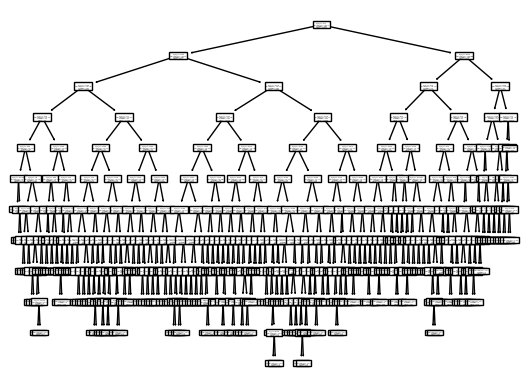

In [21]:
from sklearn import tree

# Initialisation des paramètres du modèle
model_tree = DecisionTreeRegressor(max_depth=None)

# Entraînement du modèle d'arbre 
model_tree.fit(data, y)

# Visualisation de l'arbre
tree.plot_tree(model_tree)
plt.show()

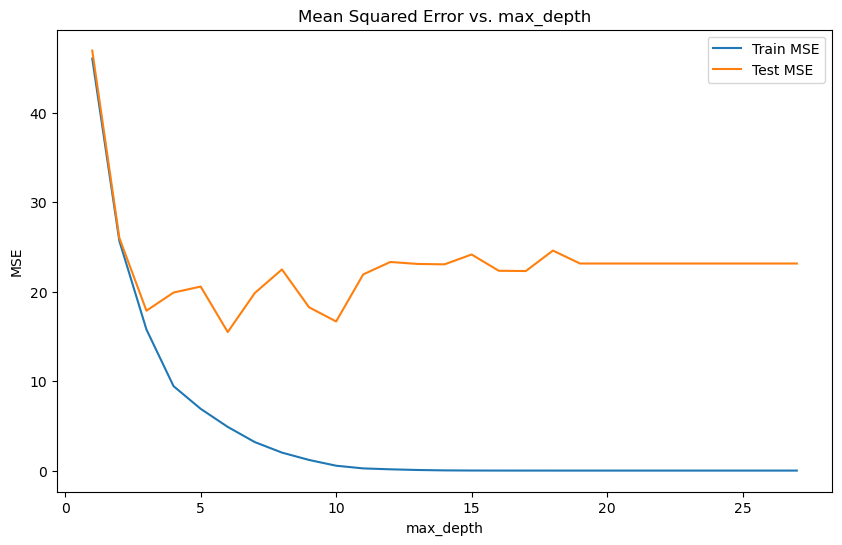

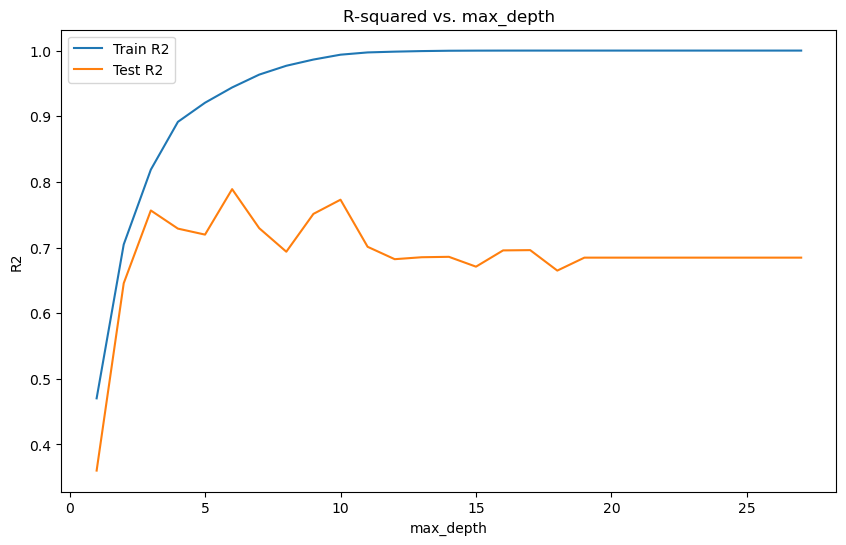

In [33]:
#Plage de valeurs pour faire varier max_depth
max_depth_values = range(1, 28)

# Initialiser les listes pour stocker les résultats
train_mse_scores = []
test_mse_scores = []
train_r2_scores = []
test_r2_scores = []

# Boucler sur les valeurs de max_depth
for max_depth in max_depth_values:
    # Initialiser et entraîner le modèle d'arbre de régression
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    # Prédictions sur l'ensemble de test
    y_test_pred = model.predict(X_test)
    
    # Calculer MSE et R2 pour l'ensemble d'entraînement
    train_mse = m_s_e(y_train, y_train_pred)
    train_r2 = r2s(y_train, y_train_pred)
    # Calculer MSE et R2 pour l'ensemble de test
    test_mse = m_s_e(y_test, y_test_pred)
    test_r2 = r2s(y_test, y_test_pred)
    
    # Ajouter les résultats aux listes
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Tracer la courbe de la MSE en fonction de max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_mse_scores, label='Train MSE')
plt.plot(max_depth_values, test_mse_scores, label='Test MSE')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Mean Squared Error vs. max_depth')
plt.legend()
plt.show()

# Tracer la courbe du R2 en fonction de max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_r2_scores, label='Train R2')
plt.plot(max_depth_values, test_r2_scores, label='Test R2')
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.title('R-squared vs. max_depth')
plt.legend()
plt.show()

#Q3 _ Quelle remarque fait-on ?

En examinant les graphiques, on constate une tendance à la diminution de la MSE sur l'ensemble d'entraînement avec une profondeur d'arbre accrue, mais une fluctuation ou une stabilisation de cette mesure sur l'ensemble de test, suggérant un risque de surajustement. Le R² augmente généralement avec la profondeur de l'arbre sur l'ensemble d'entraînement, mais peut se stabiliser ou diminuer sur l'ensemble de test, illustrant une tension entre la complexité du modèle et sa capacité à généraliser. Le choix approprié de la profondeur de l'arbre devrait viser à minimiser la MSE tout en maximisant le R² sur l'ensemble de test, afin d'obtenir une généralisation optimale du modèle.

In [ ]:
#Q4 _ Entraîner plusieurs forêts aléatoires en faisant varier le paramètre max_depth. Evaluer les performances avec la MSE et le R2, sur train et test, et tracer la courbe de ces métriques en fonction de max_depth. Que remarquez-vous?

In [39]:
import pandas as pd

# Charger le jeu de données Boston
Boston_df = pd.DataFrame(data=Boston.data, columns=Boston.feature_names)

# Ajouter la colonne de la valeur médiane des maisons (target) au DataFrame
Boston_df['MEDV'] = Boston.target

# Afficher les premières lignes du DataFrame
print(Boston_df.head())

AttributeError: 'str' object has no attribute 'data'

In [42]:
#Q5

print(data.head())

_

_
model_1 = RandomForestClassifier(max_depth=10, random_state=123)
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)
print(np.sum(y_pred_1 == y_test)/x_test.shape[0])

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   TAX  PTRATIO       B  LSTAT  House Price  
0  296     15.3  396.90   4.98         24.0  
1  242     17.8  396.90   9.14         21.6  
2  242     17.8  392.83   4.03         34.7  
3  222     18.7  394.63   2.94         33.4  
4  222     18.7  396.90   5.33         36.2  


NameError: name 'x_train' is not defined